In [1]:
# Import pandas 
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')

In [3]:
# Top 5 rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Check the shape 
data.shape

(30000, 25)

In [5]:
# Set the features 
X = data.iloc[:,1:-1].values

In [6]:
# Check the shape 
X.shape

(30000, 23)

In [7]:
# import matplotlib
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Frequency of datapoints')

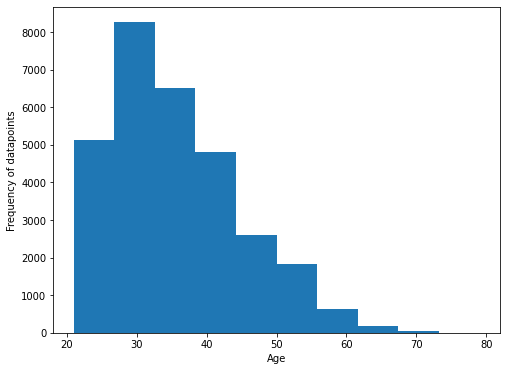

In [8]:
# See how data is spreaded
plt.figure(figsize=(8,6))
plt.hist(X[:,4])
plt.xlabel('Age')
plt.ylabel('Frequency of datapoints')

In [9]:
# Import IF and LOF
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [10]:
# Initialize and train the IF
IF = IsolationForest(random_state=0)
IF.fit(X)

IsolationForest(random_state=0)

In [11]:
# Initialize and train LOF
LOF = LocalOutlierFactor()
LOF.fit(X)

LocalOutlierFactor()

In [12]:
# Anomalies given by IF
IF_anomalies = IF.predict(X)

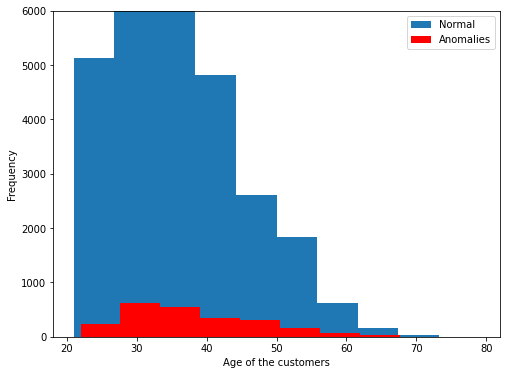

In [13]:
# Ploting anomalies given by IF
plt.figure(figsize=(8,6))
plt.hist(X[:,4],label='Normal')
plt.hist(X[IF_anomalies==-1][:,4], color='red', label='Anomalies')
plt.xlabel('Age of the customers')
plt.ylabel('Frequency')
plt.ylim((0,6000))
plt.legend()

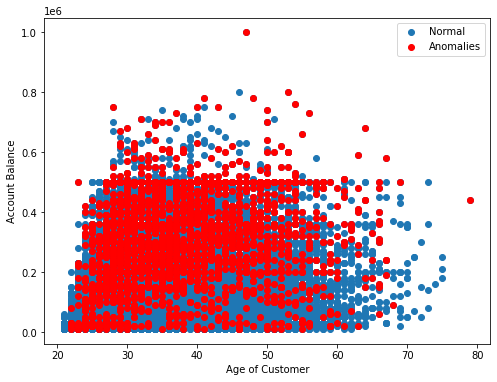

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,4],X[:,0],label='Normal')
plt.scatter(X[IF_anomalies==-1][:,4],X[IF_anomalies==-1][:,0], color='red', label='Anomalies')
plt.xlabel('Age of Customer')
plt.ylabel('Account Balance')
plt.legend()

In [15]:
# Anomalies given by the LOF
LOF_anomalies = LOF.fit_predict(X)

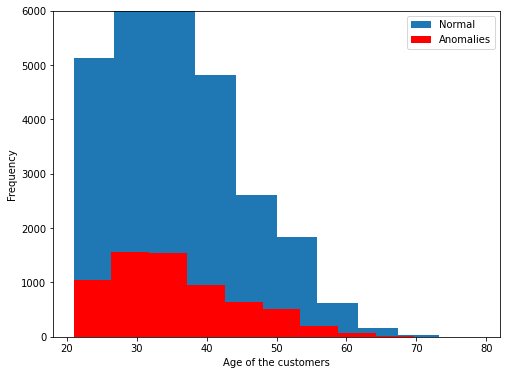

In [16]:
# Ploting anomalies given by LOF
plt.figure(figsize=(8,6))
plt.hist(X[:,4],label='Normal')
plt.hist(X[LOF_anomalies==-1][:,4], color='red', label='Anomalies')
plt.xlabel('Age of the customers')
plt.ylabel('Frequency')
plt.ylim((0,6000))
plt.legend()